In [1]:
#| default_exp data

# DataLoader

> A simple API for creating and using playing cards

In [2]:
#| export
from torch import tensor
import torch

from fastcore.utils import *
from tinypytorch.core import *

import matplotlib.pyplot as plt

In [3]:
#| hide
from nbdev.showdoc import *
from fastcore.test import *

### Sample Data

In [4]:
#| export
import pickle

In [5]:
#| export
def get_local_data():
    f = open('mnist.pkl', 'rb')
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
    return x_train, y_train, x_valid, y_valid

In [6]:
x_train, y_train, x_valid, y_valid = get_local_data()

### Dataset

In [1]:
#| export
class Dataset:
    def __init__(self, x: 'input', y: 'output'):
        self.x, self.y = x, y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

In [8]:
train_ds, valid_ds = Dataset(x_train, y_train), Dataset(x_valid, y_valid)

In [9]:
assert len(train_ds) == len(x_train)

In [10]:
assert len(valid_ds) == len(y_valid)

### Random Sampling

In [11]:
#| export
class Sampler():
    def __init__(self,
                 ds, # dataset
                 bs, # batch size
                 shuffle=False): # shuffle or not?
        self.n, self.bs, self.shuffle = len(ds), bs, shuffle
    
    def __iter__(self):
        self.idxs = torch.randperm(self.n) if self.shuffle else torch.arange(self.n)
        for i in range(0, self.n, self.bs):
            yield self.idxs[i:i+self.bs]

In [12]:
small_ds = Dataset(*train_ds[:10])

In [13]:
t = Sampler(small_ds, 3, False)
[o for o in t]

[tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9])]

In [14]:
f = Sampler(small_ds, 3, True)
[o for o in f]

[tensor([0, 5, 8]), tensor([7, 4, 2]), tensor([3, 9, 6]), tensor([1])]

### DataLoader

Python `range` syntax: `range(start, stop, step)`

In [2]:
# #| export
# class DataLoader:
#     def __init__(self,
#                  ds, # dataset,
#                  bs, ): # batch size
#         self.ds = ds
#         self.bs = bs
    
#     def __iter__(self):
#         for i in range(0, len(self.ds), self.bs):
#             yield self.ds[i:i+self.bs]

In [16]:
batch_size = 30

In [17]:
train_dl = DataLoader(train_ds, batch_size)

In [18]:
valid_dl = DataLoader(valid_ds, batch_size)

In [19]:
# TODO: understand next(iter(x))

In [20]:
xb, yb = next(iter(valid_dl))

In [40]:
#| export
def collate(b):
    xs, ys = zip(*b)
    return torch.stack(xs), torch.stack(ys)

In [39]:
#| export
class DataLoader():
    def __init__(self, ds, sampler, collate_fn=collate):
        self.ds = ds
        self.sampler = sampler
        self.collate_fn = collate
    
    def __iter__(self):
        for s in self.sampler:
            yield self.collate_fn([self.ds[i] for i in s])

In [23]:
train_samp = Sampler(train_ds, batch_size, shuffle=True)
valid_samp = Sampler(valid_ds, batch_size, shuffle=False)

In [24]:
train_dl = DataLoader(train_ds, sampler=train_samp, collate_fn=collate)

In [25]:
valid_dl = DataLoader(valid_ds, sampler=valid_samp, collate_fn=collate)

In [36]:
xb, yb = next(iter(valid_dl))

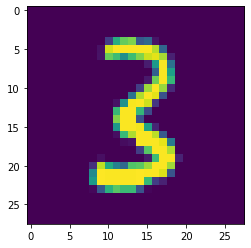

In [37]:
plt.imshow(xb[0].view(28, 28))